In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('mmc4.csv')

In [4]:
df.head()

,date_time,Time,hr,steps,Galvanic skin response,calories,temp,sec,Unnamed: 8
0,15-08-2016 00:00,00:00:00,122.0,0,0.000052,7.5,77.9,0,0.0
1,15-08-2016 00:01,00:01:00,135.0,0,0.000051,8.2,77.9,1,NaN
2,15-08-2016 00:02,00:02:00,111.0,0,0.000052,6.2,77.9,2,NaN
3,15-08-2016 00:03,00:03:00,109.0,0,0.000053,5.6,77.0,3,NaN
4,15-08-2016 00:04,00:04:00,126.0,0,0.000053,9.0,77.0,4,NaN


In [5]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,hr,steps,Galvanic skin response,calories,temp,sec,Unnamed: 8
count,69941.00,73440.00,69921.00,73440.00,69921.00,73440.00,1.00
mean,90.09,5.40,0.09,2.34,87.41,36719.50,0.00
std,14.50,18.68,0.95,1.40,2.63,21200.45,nan
min,39.00,0.00,0.00,1.20,69.80,0.00,0.00
25%,81.00,0.00,0.00,1.50,86.00,18359.75,0.00
50%,91.00,0.00,0.00,2.00,87.80,36719.50,0.00
75%,99.00,0.00,0.00,2.60,88.70,55079.25,0.00
max,187.00,146.00,28.52,19.10,98.60,73439.00,0.00


In [6]:
df['calories'].unique()

array([ 7.5,  8.2,  6.2,  5.6,  9. ,  5.7, 10.1, 13.3, 10.4,  6.7,  8.6,
       10.3, 12.8, 10.8, 11.6, 10.7, 11.5, 12.3,  1.6,  1.5,  1.4,  3.2,
        2.8,  2.1,  2.3,  2.7,  2.9,  4.2,  3.4,  2.4,  3.3,  5.9,  9.1,
        9.8,  9.6, 10. ,  7.4,  5.5,  4.7,  2.5,  2.2,  1.8,  1.7,  3.8,
        7.2,  4.4,  2. ,  1.9,  3.6,  2.6,  4.5,  3. ,  3.7,  4.8,  5.1,
        5.2,  6.8,  7.6,  5.4,  3.1,  4.3,  6. ,  3.5,  4.1,  4. ,  6.6,
        7. ,  3.9,  6.4,  6.5,  9.5, 14.2, 11.8,  5. ,  7.7,  8.7, 10.5,
        8. ,  5.8,  4.9,  5.3,  7.1,  9.2,  9.7,  7.9,  9.4,  8.3,  7.3,
        9.9,  6.9,  8.1, 12.2,  4.6,  8.8,  8.9,  8.4,  7.8,  6.1, 14.7,
       13.8, 17.1, 10.2,  9.3, 12.5, 10.6, 12.9, 11. , 16.2, 17.3, 14.5,
        8.5, 10.9, 12.7, 13. , 13.2, 17.6, 14.1, 17.5, 16.7, 11.2, 12.6,
        1.3, 13.6,  1.2, 11.1, 12. ,  6.3, 16. , 11.7, 16.9, 17.8, 17.4,
       18. , 15.3, 11.9, 13.4, 13.1, 14.9, 13.5, 14. , 13.7, 12.1, 15.6,
       14.4, 15.1, 18.4, 15.7, 15.4, 18.6, 18.2, 16

In [7]:
df=df.drop('steps', axis=1)

In [8]:
df=df.drop('Time', axis=1)

In [9]:
df=df.drop('sec', axis=1)

In [10]:
df=df.drop('Unnamed: 8', axis=1)

In [11]:
df.head()

,date_time,hr,Galvanic skin response,calories,temp
0,15-08-2016 00:00,122.00,0.00,7.50,77.90
1,15-08-2016 00:01,135.00,0.00,8.20,77.90
2,15-08-2016 00:02,111.00,0.00,6.20,77.90
3,15-08-2016 00:03,109.00,0.00,5.60,77.00
4,15-08-2016 00:04,126.00,0.00,9.00,77.00


In [12]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

2.869553376906318


In [13]:
df.isnull().sum()

date_time                    0
hr                        3499
Galvanic skin response    3519
calories                     0
temp                      3519
dtype: int64

In [14]:
df = df.bfill(axis ='columns')

In [16]:
df.head()

,date_time,hr,Galvanic skin response,calories,temp
0,15-08-2016 00:00,122.00,0.00,7.50,77.90
1,15-08-2016 00:01,135.00,0.00,8.20,77.90
2,15-08-2016 00:02,111.00,0.00,6.20,77.90
3,15-08-2016 00:03,109.00,0.00,5.60,77.00
4,15-08-2016 00:04,126.00,0.00,9.00,77.00


In [17]:
df = df.ffill(axis ='columns')

In [18]:
df.isnull().sum()

date_time                 0
hr                        0
Galvanic skin response    0
calories                  0
temp                      0
dtype: int64

## Visualizing time series data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize': (25, 7)})

In [20]:
df['hr'].unique()

array([1.22000e+02, 1.35000e+02, 1.11000e+02, 1.09000e+02, 1.26000e+02,
       1.25000e+02, 1.38000e+02, 1.49000e+02, 1.29000e+02, 1.48000e+02,
       1.69000e+02, 1.61000e+02, 1.46000e+02, 1.60000e+02, 1.56000e+02,
       1.47000e+02, 1.45000e+02, 1.33000e+02, 1.43000e+02, 9.80000e+01,
       1.12000e+02, 1.34000e+02, 1.32000e+02, 1.37000e+02, 1.16000e+02,
       1.06000e+02, 9.90000e+01, 1.63000e+02, 1.30000e+02, 9.20000e+01,
       9.10000e+01, 8.50000e+01, 8.30000e+01, 1.18000e+02, 1.15000e+02,
       1.28000e+02, 1.31000e+02, 1.36000e+02, 1.23000e+02, 9.00000e+01,
       8.90000e+01, 1.01000e+02, 1.08000e+02, 1.17000e+02, 1.51000e+02,
       1.39000e+02, 1.27000e+02, 1.20000e+02, 1.24000e+02, 1.41000e+02,
       1.44000e+02, 1.50000e+00, 1.40000e+00, 1.05000e+02, 1.00000e+02,
       9.70000e+01, 1.04000e+02, 9.50000e+01, 1.21000e+02, 1.03000e+02,
       9.60000e+01, 9.30000e+01, 8.70000e+01, 1.13000e+02, 1.14000e+02,
       7.60000e+01, 9.40000e+01, 8.10000e+01, 8.40000e+01, 8.800

<AxesSubplot:>

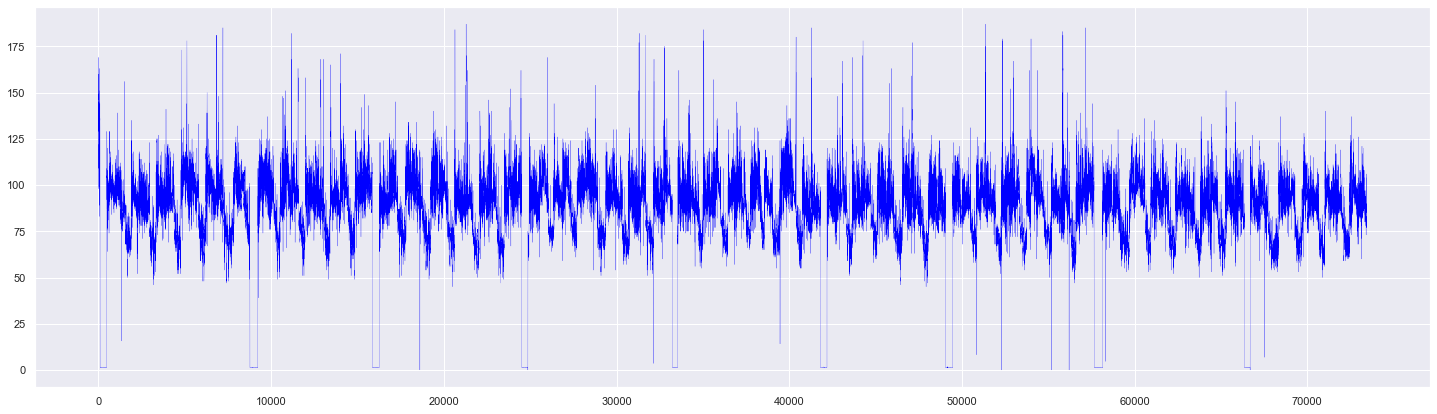

In [21]:
df['hr'].plot(linewidth = 0.2,color='blue')

In [22]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [23]:
df.dtypes

date_time                 datetime64[ns]
hr                               float64
Galvanic skin response           float64
calories                         float64
temp                             float64
dtype: object

In [24]:
# Displaying random sample of 5 rows
df.sample(5, random_state = 0)

,date_time,hr,Galvanic skin response,calories,temp
58898,2016-09-24 21:38:00,93.00,0.00,2.40,87.80
71292,2016-03-10 12:12:00,89.00,0.00,2.20,86.90
10538,2016-08-22 07:38:00,86.00,0.00,1.70,85.10
770,2016-08-15 12:50:00,95.00,0.00,2.10,89.60
66985,2016-09-30 12:25:00,84.00,0.00,1.90,89.60


In [25]:
df.columns

Index(['date_time', 'hr', 'Galvanic skin response', 'calories', 'temp'], dtype='object')

<AxesSubplot:>

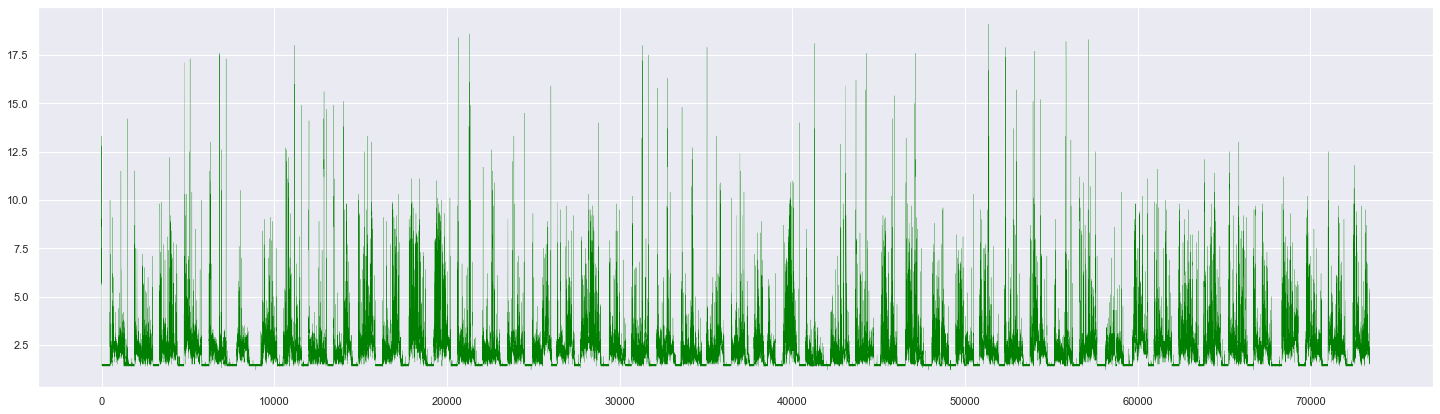

In [26]:
df['calories'].plot(linewidth = 0.2,color='green')

<AxesSubplot:>

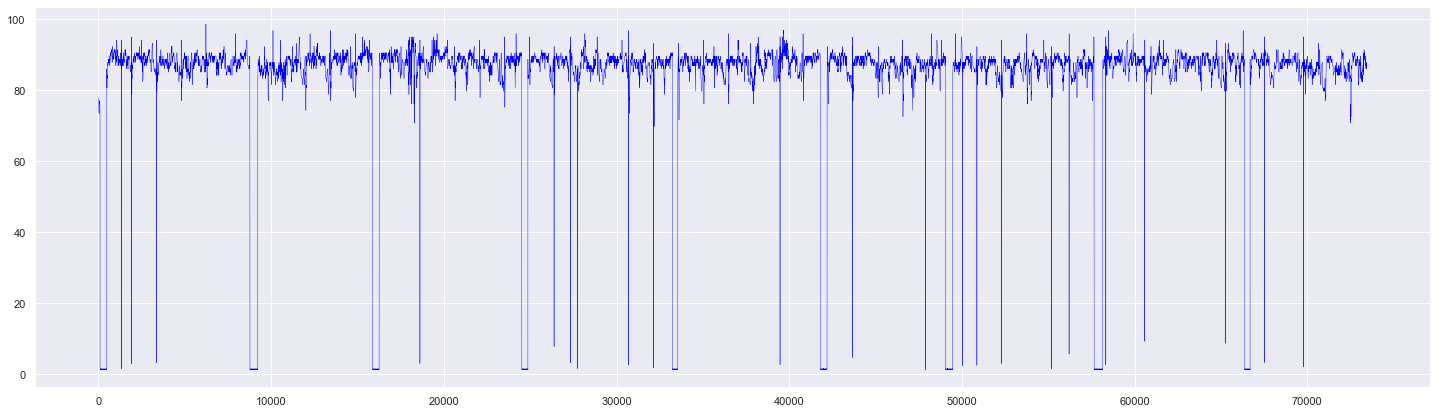

In [27]:
df['temp'].plot(linewidth = 0.4,color='blue')

In [28]:
df['temp'] = np.where(df['temp'].between(0,70), 96.67, df['temp'])

<AxesSubplot:>

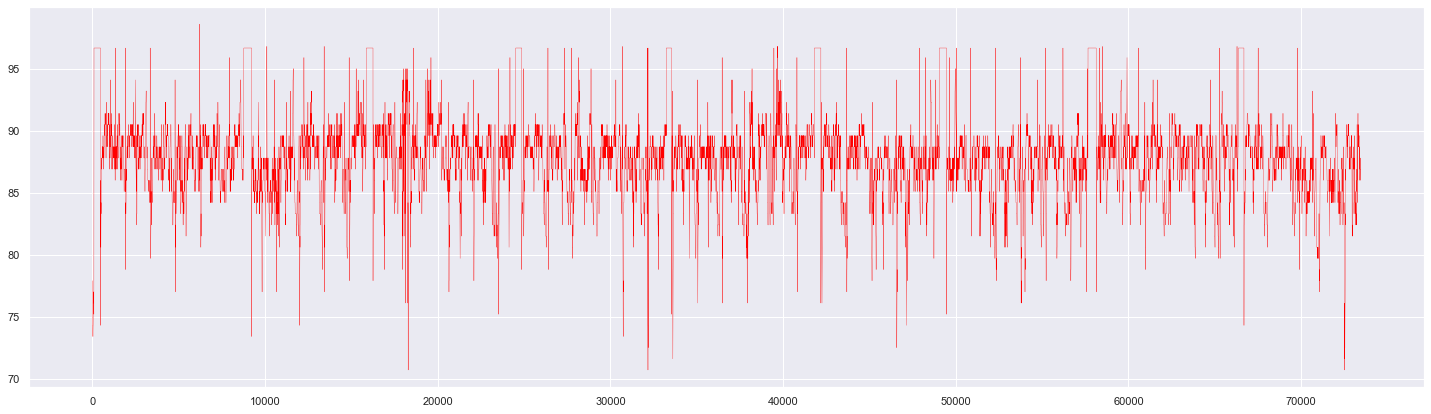

In [29]:
df['temp'].plot(linewidth = 0.3,color='red')

In [30]:
df['temp'].unique()

array([77.9 , 77.  , 76.1 , 75.2 , 74.3 , 73.4 , 96.67, 79.7 , 81.5 ,
       82.4 , 83.3 , 84.2 , 85.1 , 86.  , 80.6 , 86.9 , 87.8 , 88.7 ,
       89.6 , 90.5 , 91.4 , 92.3 , 93.2 , 94.1 , 95.  , 78.8 , 97.7 ,
       98.6 , 96.8 , 95.9 , 70.7 , 72.5 , 71.6 ])

<AxesSubplot:>

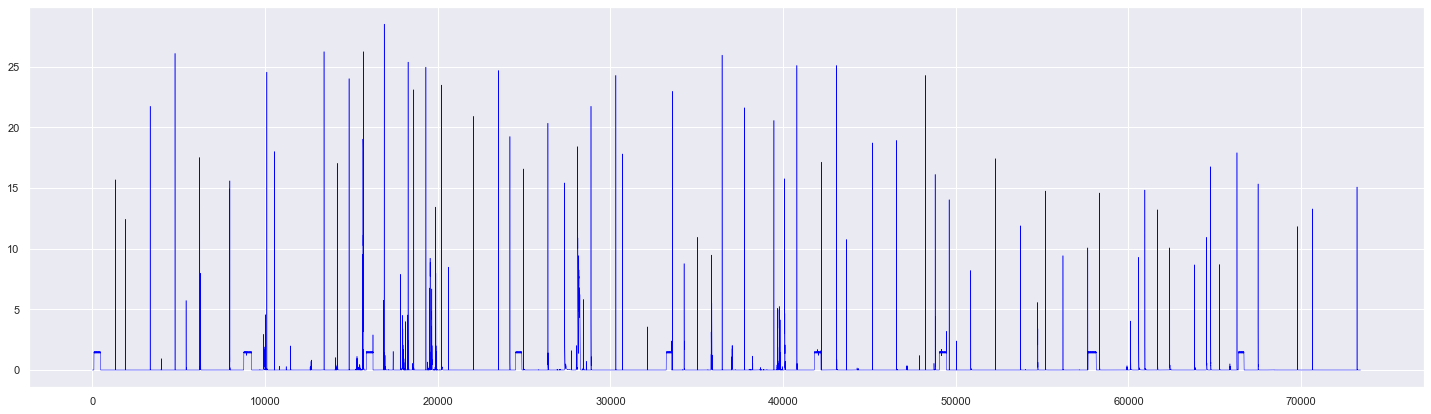

In [31]:
df['Galvanic skin response'].plot(linewidth = 0.5,color='blue')

In [32]:
df1 = df.rename(columns = {'date_time': 'ds', 'hr':'y','Galvanic skin response': 'gsr','calories':'cal'}, inplace = False)

In [33]:
df1.columns = ['ds','y','gsr','cal','temp']
df1.head()

,ds,y,gsr,cal,temp
0,2016-08-15 00:00:00,122.00,0.00,7.50,77.90
1,2016-08-15 00:01:00,135.00,0.00,8.20,77.90
2,2016-08-15 00:02:00,111.00,0.00,6.20,77.90
3,2016-08-15 00:03:00,109.00,0.00,5.60,77.00
4,2016-08-15 00:04:00,126.00,0.00,9.00,77.00


In [34]:
del df1["gsr"]
del df1["cal"]
del df1["temp"]

In [35]:
df1.head()

,ds,y
0,2016-08-15 00:00:00,122.00
1,2016-08-15 00:01:00,135.00
2,2016-08-15 00:02:00,111.00
3,2016-08-15 00:03:00,109.00
4,2016-08-15 00:04:00,126.00


## Model training

In [36]:
from fbprophet import Prophet

In [37]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

### Initialize the Model


In [38]:
model=Prophet()

In [39]:
df1.columns

Index(['ds', 'y'], dtype='object')

In [40]:
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [41]:
future_dates=model.make_future_dataframe(periods=365)

In [42]:
prediction=model.predict(future_dates)

In [43]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-09 00:00:00,80.94,56.05,103.12,80.94,80.94,-1.60,-1.60,-1.60,3.16,3.16,3.16,-4.75,-4.75,-4.75,0.00,0.00,0.00,79.35
1,2016-01-09 00:01:00,80.94,55.74,102.24,80.94,80.94,-1.70,-1.70,-1.70,3.05,3.05,3.05,-4.75,-4.75,-4.75,0.00,0.00,0.00,79.24
2,2016-01-09 00:02:00,80.94,57.11,102.93,80.94,80.94,-1.80,-1.80,-1.80,2.95,2.95,2.95,-4.75,-4.75,-4.75,0.00,0.00,0.00,79.14
3,2016-01-09 00:03:00,80.94,57.45,101.79,80.94,80.94,-1.91,-1.91,-1.91,2.85,2.85,2.85,-4.75,-4.75,-4.75,0.00,0.00,0.00,79.03
4,2016-01-09 00:04:00,80.94,55.97,100.54,80.94,80.94,-2.02,-2.02,-2.02,2.74,2.74,2.74,-4.76,-4.76,-4.76,0.00,0.00,0.00,78.93


In [53]:
sns.set(rc = {'figure.figsize': (25, 7)})

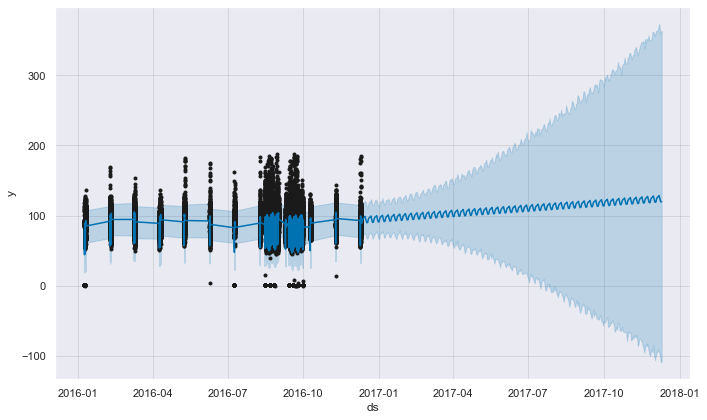

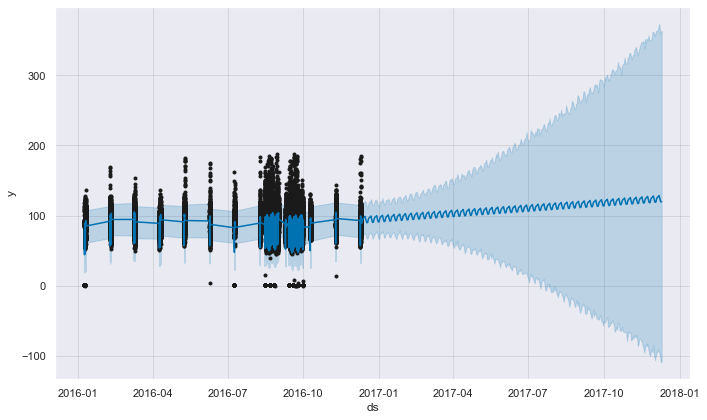

In [56]:
model.plot(prediction)

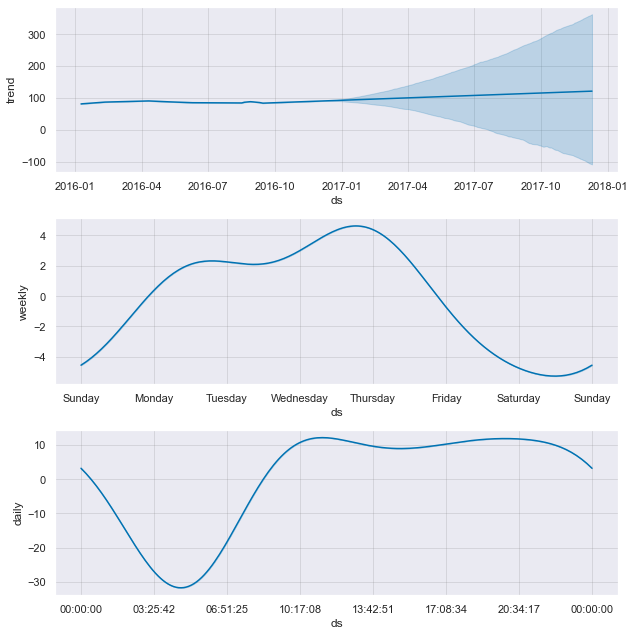

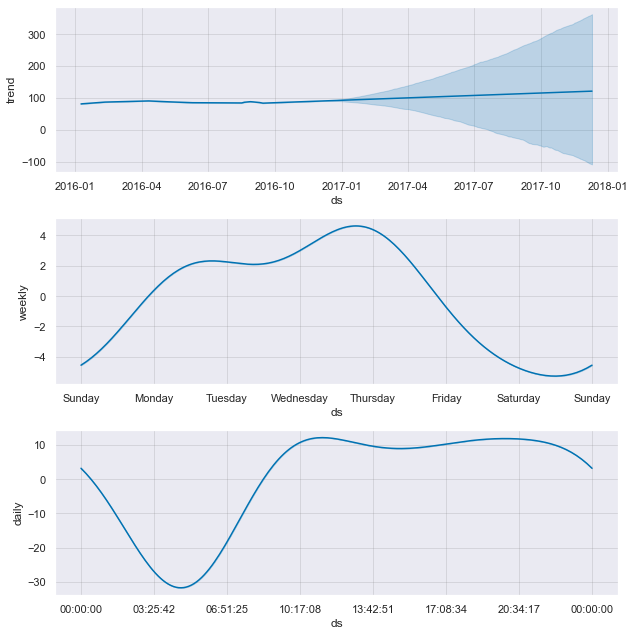

In [45]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [52]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-09 00:00:00,79.35,56.05,103.12
1,2016-01-09 00:01:00,79.24,55.74,102.24
2,2016-01-09 00:02:00,79.14,57.11,102.93
3,2016-01-09 00:03:00,79.03,57.45,101.79
4,2016-01-09 00:04:00,78.93,55.97,100.54


<AxesSubplot:xlabel='ds'>

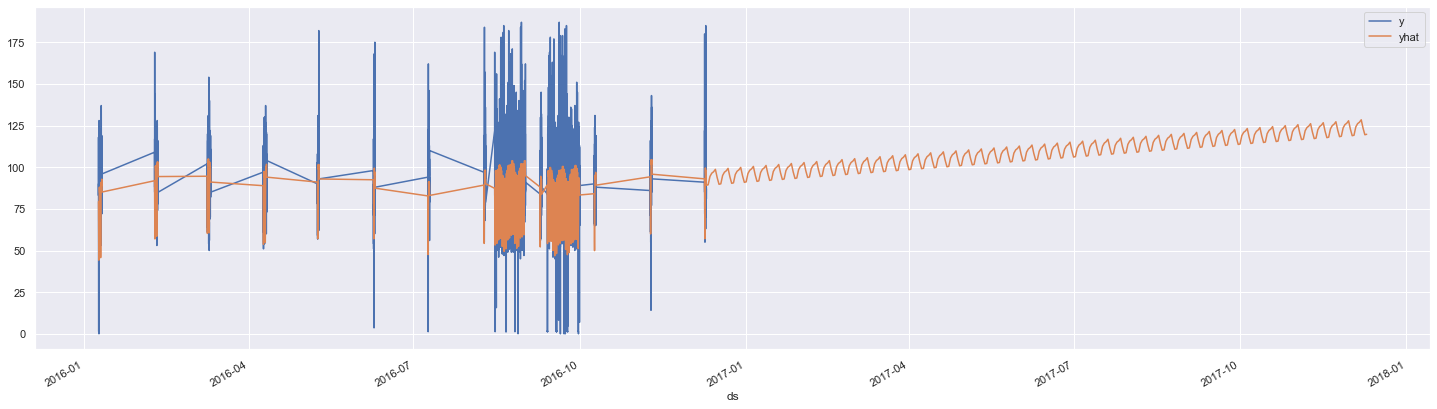

In [51]:
pd.concat([df1.set_index('ds')['y'],prediction.set_index('ds')['yhat']], axis=1).plot()